In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2

In [2]:
train_dir="D:\AI_ML\Theory\ML\intel-image-classification\seg_train\seg_train"
category=["buildings","forest","glacier","mountain","sea","street"]

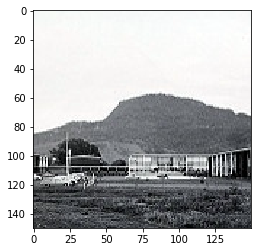

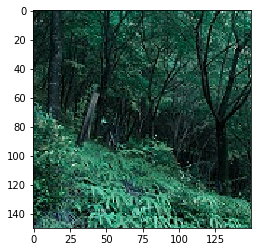

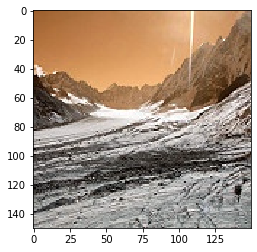

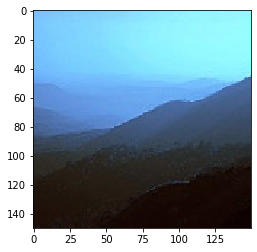

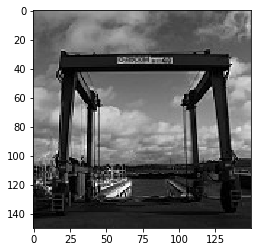

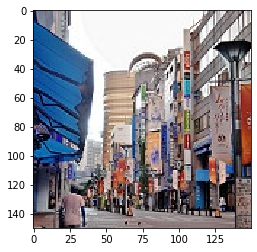

In [3]:
for i in category:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
      

In [4]:
test_dir="D:AI_ML/Theory/ML/intel-image-classification/seg_test/seg_test"
category=["buildings","forest","glacier","mountain","sea","street"]

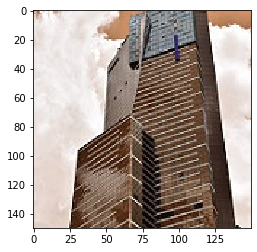

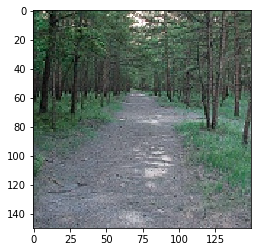

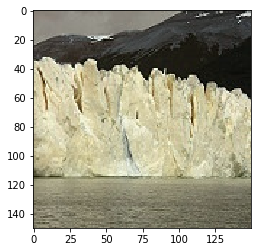

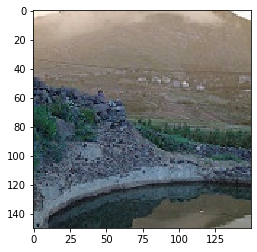

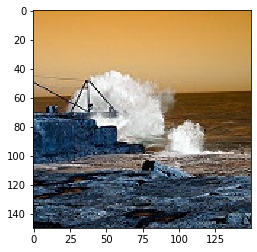

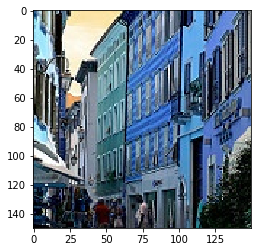

In [5]:
for i in category:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
      

In [6]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(train_dir,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(150,150),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
training_data

[[array([[247, 247, 248, ..., 248, 247, 247],
         [246, 247, 247, ..., 248, 247, 247],
         [246, 246, 247, ..., 248, 247, 247],
         ...,
         [ 46,  61,  48, ...,  47,  41,  90],
         [ 76,  46,  42, ...,  18,  51,  35],
         [ 58,  54,  59, ...,  27,  47,  59]], dtype=uint8), 0],
 [array([[113, 114, 113, ..., 224, 222, 219],
         [115, 115, 114, ..., 234, 231, 229],
         [116, 115, 114, ..., 240, 238, 235],
         ...,
         [ 34,  48,  39, ...,  44,  49,  49],
         [ 21,  38,  39, ...,  69,  59,  44],
         [ 58,  12,  39, ...,  19,  60,  61]], dtype=uint8), 0],
 [array([[181, 181, 181, ..., 203, 204, 205],
         [181, 181, 181, ..., 205, 206, 204],
         [180, 180, 180, ..., 206, 207, 206],
         ...,
         [170, 167, 164, ..., 129, 125, 128],
         [187, 198, 213, ..., 138, 136, 142],
         [250, 246, 242, ..., 137, 131, 135]], dtype=uint8), 0],
 [array([[196, 168, 171, ...,  13,   2, 206],
         [196, 168, 173, ..

In [8]:
len(training_data)

14034

In [9]:
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
2
3
0
0
1
0
3


In [11]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(test_dir,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(150,150),interpolation=cv2.INTER_AREA)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [12]:
testing_data

[[array([[117, 138, 122, ..., 143, 144, 144],
         [110, 179, 161, ..., 141, 142, 142],
         [149, 158, 174, ..., 139, 139, 139],
         ...,
         [206, 206, 205, ..., 230, 232, 234],
         [205, 205, 205, ..., 230, 234, 238],
         [203, 203, 204, ..., 229, 236, 240]], dtype=uint8), 0],
 [array([[165, 164, 163, ...,  65,  79,  86],
         [171, 170, 169, ...,  21,  62,  44],
         [161, 162, 163, ...,  37,  71,  39],
         ...,
         [143, 146, 143, ..., 139, 136, 136],
         [139, 142, 140, ..., 135, 137, 139],
         [137, 139, 140, ..., 137, 140, 144]], dtype=uint8), 0],
 [array([[233, 233, 233, ..., 220, 218, 219],
         [227, 227, 228, ..., 225, 224, 225],
         [221, 223, 225, ..., 232, 231, 231],
         ...,
         [133,  10,  71, ...,  33,  46,  43],
         [ 99,  48,  40, ...,  28,  44,  42],
         [129,  57,  46, ...,   9,  38,  45]], dtype=uint8), 0],
 [array([[172, 172, 172, ..., 102, 104,  50],
         [171, 171, 171, ..

In [13]:
len(testing_data)

3000

In [14]:
random.shuffle(testing_data)

In [15]:
for sample in testing_data[:10]:
    print(sample[1])

1
3
1
4
0
5
2
0
0
2


In [16]:
X=[]
y=[]

In [17]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [18]:
len(X)

14034

In [19]:
len(y)

14034

In [20]:
X=np.array(X).reshape(-1,150,150,1)
X.shape

(14034, 150, 150, 1)

In [21]:
X.shape[1:]

(150, 150, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [23]:
model=Sequential()
model.add(Conv2D(35,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(30,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(35,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(30,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
X = X/255.0
X

array([[[[0.72156863],
         [0.78823529],
         [0.7372549 ],
         ...,
         [0.41568627],
         [0.71764706],
         [0.81568627]],

        [[0.68235294],
         [0.98039216],
         [0.46666667],
         ...,
         [0.78823529],
         [0.83137255],
         [0.65490196]],

        [[0.56078431],
         [0.69803922],
         [0.66666667],
         ...,
         [0.90588235],
         [0.76078431],
         [0.73333333]],

        ...,

        [[0.11372549],
         [0.17254902],
         [0.06666667],
         ...,
         [0.26666667],
         [0.45098039],
         [0.32941176]],

        [[0.04313725],
         [0.05098039],
         [0.15686275],
         ...,
         [0.51372549],
         [0.39215686],
         [0.21176471]],

        [[0.10196078],
         [0.21568627],
         [0.11764706],
         ...,
         [0.05098039],
         [0.23921569],
         [0.24705882]]],


       [[[0.00784314],
         [0.00392157],
         [0.02

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_ONEHOT=to_categorical(y)


In [27]:
y_ONEHOT.shape

(14034, 6)

In [28]:
X.shape

(14034, 150, 150, 1)

In [29]:
model.fit(X,y_ONEHOT,validation_split=0.1,epochs=15)

Train on 12630 samples, validate on 1404 samples
Epoch 1/15
12630/12630 [==============================] - 528s 42ms/sample - loss: 1.1834 - accuracy: 0.5329 - val_loss: 0.8953 - val_accuracy: 0.6702
Epoch 2/15
12630/12630 [==============================] - 475s 38ms/sample - loss: 0.8463 - accuracy: 0.6768 - val_loss: 0.7653 - val_accuracy: 0.7030
Epoch 3/15
12630/12630 [==============================] - 472s 37ms/sample - loss: 0.7274 - accuracy: 0.7324 - val_loss: 0.6879 - val_accuracy: 0.7464
Epoch 4/15
12630/12630 [==============================] - 477s 38ms/sample - loss: 0.6672 - accuracy: 0.7530 - val_loss: 0.6193 - val_accuracy: 0.7842
Epoch 5/15
12630/12630 [==============================] - 474s 38ms/sample - loss: 0.6186 - accuracy: 0.7753 - val_loss: 0.6059 - val_accuracy: 0.7942
Epoch 6/15
12630/12630 [==============================] - 1360s 108ms/sample - loss: 0.5842 - accuracy: 0.7833 - val_loss: 0.5947 - val_accuracy: 0.7821
Epoch 7/15
12630/12630 [===================